2024-08-16 20:53:49.182422
2004-08-16 20:53:49.182422


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


0.04437303874821356
0.10076989691780347
0.02210714208305139
0.054466144146373595
0.0466118380246156
0.10486074081699247
0.07167182051027142
0.12138818823859657
0.0633156863781686


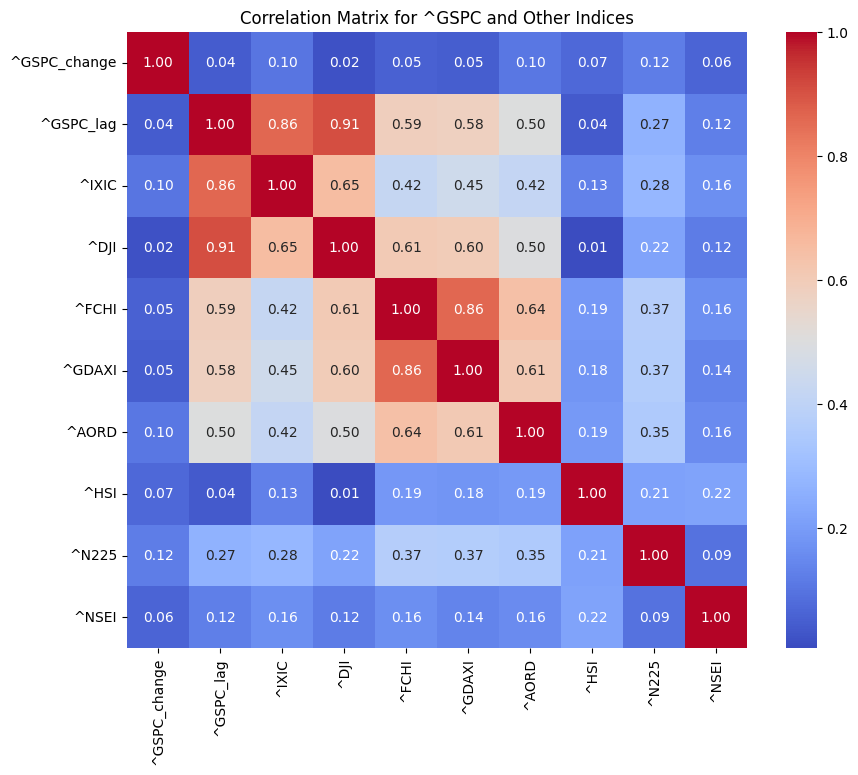

(51.409112259276654, 48.54391733208079)
(54.86143729450447, 45.09159229685299)
(50.540159699389385, 49.41286989196806)
(51.409112259276654, 48.567402536402064)
(51.66744950681071, 48.28558008454674)
(52.865194927195866, 46.97040864255519)
(53.45232503522781, 46.477219351808365)
(54.22733677782997, 45.72569281352748)
(53.54626585251292, 46.406763738844525)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


(3406, 6)
(792, 6)
(3406, 1)
(792, 1)
torch.Size([3396, 10, 6])
torch.Size([3396, 1])
torch.Size([782, 10, 6])
torch.Size([782, 1])


In [8]:
%run DataProcessing.ipynb

In [9]:
import torch
import torch.nn as nn 
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

### Create DataLoader instances

In [10]:
train_dataset = TensorDataset(X_train_seq, y_train_seq)
test_dataset = TensorDataset(X_test_seq, y_test_seq)

train_loader = DataLoader(train_dataset, batch_size = 32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle=False)

### Create LSTM class

In [11]:
class LSTMModel(nn.Module):
    def __init__(self, input_size=6, hidden_size=50, num_layers=3, output_size=1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # Shape of each out:
        # (batch_size, sequence_length, hidden_size)
        outputs, _ = self.lstm(x)
        outputs = self.fc(outputs[:, -1, :])
        return outputs

# Instantiate the model
model = LSTMModel()

### Model Training

In [12]:
# Define loss function and optimizer
criterion = nn.MSELoss() # Mean Squared Error
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [13]:
# Define Mean Absolute Percentage Error (MAPE) function
def get_mape(y_true, y_pred):
    if y_true.shape == y_pred.shape: 
        epsilon = 1e-8  # Small value to avoid division by zero
        percentage_error = torch.abs((y_true - y_pred) / (y_true + epsilon))
        
        # Calculate the mean of absolute percentage error
        mape = torch.mean(percentage_error)
        
        return mape.item()

In [14]:
num_epochs = 60

model.train()

for epoch in range(num_epochs):
    model.train()
    # (Batch Size, Time Steps, Number of Features)
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad() 
        train_predictions = model(X_batch)
        mse = criterion(train_predictions, y_batch)
        mse.backward()
        optimizer.step()
    mape = get_mape(y_batch, train_predictions)
    print(f'Epoch [{epoch + 1}/{num_epochs}], MSE: {mse.item():.2f}, MAPE: {mape:.2f}')


Epoch [1/60], MSE: 1514.19, MAPE: 1.01
Epoch [2/60], MSE: 1511.81, MAPE: 1.01
Epoch [3/60], MSE: 1508.18, MAPE: 1.00
Epoch [4/60], MSE: 1485.34, MAPE: 0.99
Epoch [5/60], MSE: 1476.24, MAPE: 0.98
Epoch [6/60], MSE: 1478.52, MAPE: 0.98
Epoch [7/60], MSE: 1476.92, MAPE: 0.98
Epoch [8/60], MSE: 1459.09, MAPE: 0.97
Epoch [9/60], MSE: 1445.52, MAPE: 0.97
Epoch [10/60], MSE: 1450.63, MAPE: 0.97
Epoch [11/60], MSE: 1425.92, MAPE: 0.96
Epoch [12/60], MSE: 1419.55, MAPE: 0.95
Epoch [13/60], MSE: 1411.30, MAPE: 0.95
Epoch [14/60], MSE: 1461.95, MAPE: 0.97
Epoch [15/60], MSE: 1462.97, MAPE: 0.97
Epoch [16/60], MSE: 1461.48, MAPE: 0.97
Epoch [17/60], MSE: 1433.64, MAPE: 0.96
Epoch [18/60], MSE: 1449.20, MAPE: 0.96
Epoch [19/60], MSE: 1412.70, MAPE: 0.95
Epoch [20/60], MSE: 1405.47, MAPE: 0.95
Epoch [21/60], MSE: 1367.38, MAPE: 0.93
Epoch [22/60], MSE: 1361.49, MAPE: 0.93
Epoch [23/60], MSE: 1351.09, MAPE: 0.93
Epoch [24/60], MSE: 1331.45, MAPE: 0.92
Epoch [25/60], MSE: 1285.62, MAPE: 0.91
Epoch [26

### Model Evaluation

In [15]:
model.eval()

predictions = []
with torch.no_grad():
    test_mse = []
    test_mape = []
    for X_batch, y_batch in test_loader:
        test_predictions = model(X_batch)
        mse = criterion(test_predictions, y_batch)
        mape = get_mape(y_batch, test_predictions)
        predictions.append(test_predictions)
        test_mse.append(mse.item())
        test_mape.append(mape)
    
    average_mse_loss = sum(test_mse) / len(test_mse)
    average_mape_loss = sum(test_mape) / len(test_mape)
    print(f'Average MSE: {average_mse_loss:.2f}, Average MAPE: {average_mape_loss:.2f}')

Average MSE: 2187.41, Average MAPE: 3.08


In [16]:
# Save the model's state dictionary
torch.save(model.state_dict(), 'model_state_dict.pth')